In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#显示所有列
pd.set_option('display.max_columns', None)
##显示所有行
#pd.set_option('display.max_rows', None)
#设置value的显示长度为100，默认为50
pd.set_option('max_colwidth',100)

In [168]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

X_train = train#.drop('SalePrice',axis = 1)
Y_train = train.SalePrice

X_train.loc[:,'Yrdiff'] = X_train.YrSold -  X_train.YearRemodAdd

In [169]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# 预处理  
缺失值、顺序/编码、异常值

In [293]:
def draw_box(the_col):
    sns.boxplot(x = the_col,y = 'SalePrice',data = train)
    print(X_train.groupby(the_col)['SalePrice'].mean())

#YrBuilt

def draw_YB(this_col,obj_col = 'YearBuilt'):
    index_list = range(X_train.loc[:,obj_col].min(),X_train.loc[:,obj_col].max()+1)
    columns_list= X_train.loc[:,this_col].unique()
    dfls = pd.DataFrame(index = index_list,columns = columns_list)
    for inx in dfls.index:
        for col in dfls.columns:
            cc = X_train[(X_train.loc[:,obj_col] == inx)& (X_train.loc[:,this_col] == col)].loc[:,'SalePrice'].mean()
            dfls.loc[inx,col] = cc
    dfls.plot(figsize = (12,4),style = '-*')
    plt.title('YearBuilt')
    
def draw_YR(this_col,obj_col = 'YearRemodAdd'):
    index_list = range(X_train.loc[:,obj_col].min(),X_train.loc[:,obj_col].max()+1)
    columns_list= X_train.loc[:,this_col].unique()
    dfls = pd.DataFrame(index = index_list,columns = columns_list)
    for inx in dfls.index:
        for col in dfls.columns:
            cc = X_train[(X_train.loc[:,obj_col] == inx)& (X_train.loc[:,this_col] == col)].loc[:,'SalePrice'].mean()
            dfls.loc[inx,col] = cc
    dfls.plot(figsize = (12,4),style = '-*')
    plt.title('YearRemodAdd')
    
def draw_YS(this_col,obj_col = 'YrSold'):
    index_list = range(X_train.loc[:,obj_col].min(),X_train.loc[:,obj_col].max()+1)
    columns_list= X_train.loc[:,this_col].unique()
    dfls = pd.DataFrame(index = index_list,columns = columns_list)
    for inx in dfls.index:
        for col in dfls.columns:
            cc = X_train[(X_train.loc[:,obj_col] == inx)& (X_train.loc[:,this_col] == col)].loc[:,'SalePrice'].mean()
            dfls.loc[inx,col] = cc
    dfls.plot(figsize = (12,4),style = '-*')
    plt.title('YrSold')
    
def draw_Ydiff(this_col,obj_col = 'Yrdiff'):
    index_list = range(X_train.loc[:,obj_col].min(),X_train.loc[:,obj_col].max()+1)
    columns_list= X_train.loc[:,this_col].unique()
    dfls = pd.DataFrame(index = index_list,columns = columns_list)
    for inx in dfls.index:
        for col in dfls.columns:
            cc = X_train[(X_train.loc[:,obj_col] == inx)& (X_train.loc[:,this_col] == col)].loc[:,'SalePrice'].mean()
            dfls.loc[inx,col] = cc
    dfls.plot(figsize=(12,4),style = '-*')
    plt.title('Yrdiff')

    
def draw_all(this_col):
    draw_box(this_col)
    draw_YB(this_col)
    draw_YR(this_col)
    draw_YS(this_col)
    draw_Ydiff(this_col)

GarageCond
0    103317.283951
1    108500.000000
2    114654.028571
3    187885.735294
4    179930.000000
5    124000.000000
Name: SalePrice, dtype: float64


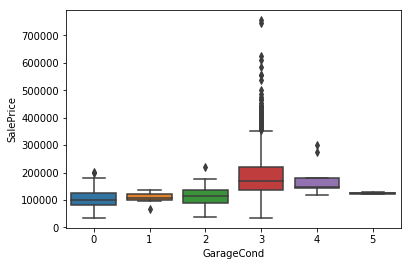

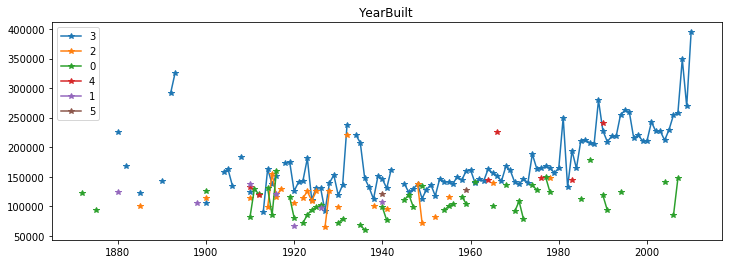

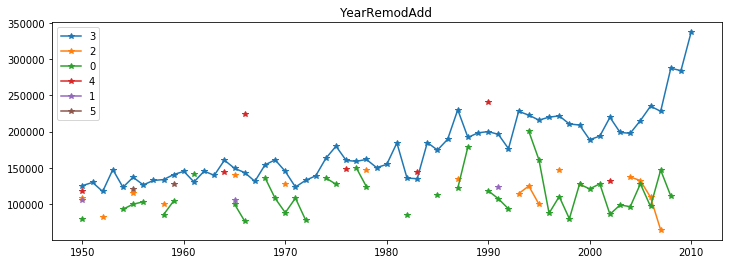

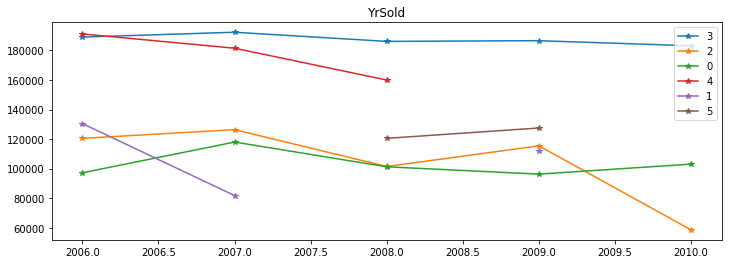

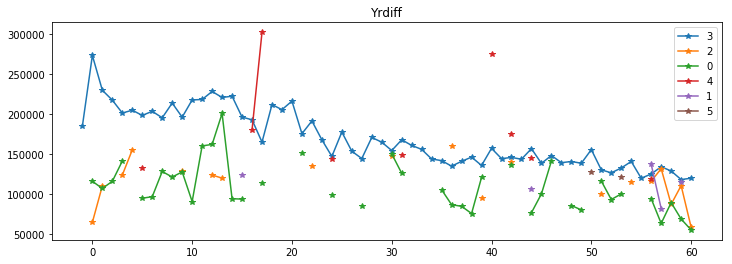

In [294]:
draw_all(this_col = 'GarageCond')

In [ ]:
processed_col = []
replace_dict_1 = {np.NAN:0,'Fa':1,'TA':2,'Gd':3,'Ex':4}
replace_dict_2 = {np.NAN:0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5}

In [172]:
X_train.PoolQC.replace(replace_dict_1,inplace = True)
processed_col.append('PoolQC')

In [173]:
X_train.MiscFeature.fillna('None',inplace = True)
processed_col.append('MiscFeature')

In [174]:
X_train.Alley.fillna('None',inplace = True)
processed_col.append('Allay')

In [175]:
X_train.Fence.fillna('None',inplace = True)
processed_col.append('Fence')

In [176]:
X_train.FireplaceQu.replace(replace_dict_2,inplace=True)
processed_col.append('FireplaceQu')

In [177]:
X_train.LotFrontage.fillna(X_train.LotFrontage.mode().values[0],inplace = True)
processed_col.append('LotFrontage')

In [187]:
X_train.GarageCond.replace(replace_dict_2,inplace = True)
processed_col.append('GarageCond')

GarageCond
0    103317.283951
1    108500.000000
2    114654.028571
3    187885.735294
4    179930.000000
5    124000.000000
Name: SalePrice, dtype: float64


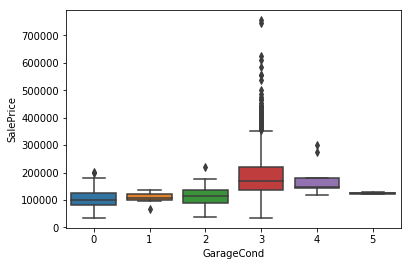

In [188]:
draw_box('GarageCond')

In [181]:
X_train.GarageType.unique()
X_train.groupby()

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', nan, 'Basment', '2Types'],
      dtype=object)

In [184]:
X_train.isna().sum().sort_values(ascending = False)

GarageYrBlt      81
GarageCond       81
GarageType       81
GarageFinish     81
GarageQual       81
BsmtExposure     38
BsmtFinType2     38
BsmtFinType1     37
BsmtCond         37
BsmtQual         37
MasVnrArea        8
MasVnrType        8
Electrical        1
Alley             0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
ExterCond         0
ExterQual         0
LotShape          0
Foundation        0
MSSubClass        0
BsmtFinSF1        0
YearRemodAdd      0
YearBuilt         0
OverallCond       0
Condition2        0
LandContour       0
Utilities         0
                 ..
3SsnPorch         0
ScreenPorch       0
PoolArea          0
PoolQC            0
Fence             0
MiscFeature       0
MiscVal           0
MoSold            0
YrSold            0
SaleType          0
GarageCars        0
Fireplaces        0
TotalBsmtSF       0
Functional        0
Heating           0
SaleCondition     0
CentralAir        0
1stFlrSF          0
2ndFlrSF          0


In [194]:
X_train.YearBuilt.unique()

array([2003, 1976, 2001, 1915, 2000, 1993, 2004, 1973, 1931, 1939, 1965,
       2005, 1962, 2006, 1960, 1929, 1970, 1967, 1958, 1930, 2002, 1968,
       2007, 1951, 1957, 1927, 1920, 1966, 1959, 1994, 1954, 1953, 1955,
       1983, 1975, 1997, 1934, 1963, 1981, 1964, 1999, 1972, 1921, 1945,
       1982, 1998, 1956, 1948, 1910, 1995, 1991, 2009, 1950, 1961, 1977,
       1985, 1979, 1885, 1919, 1990, 1969, 1935, 1988, 1971, 1952, 1936,
       1923, 1924, 1984, 1926, 1940, 1941, 1987, 1986, 2008, 1908, 1892,
       1916, 1932, 1918, 1912, 1947, 1925, 1900, 1980, 1989, 1992, 1949,
       1880, 1928, 1978, 1922, 1996, 2010, 1946, 1913, 1937, 1942, 1938,
       1974, 1893, 1914, 1906, 1890, 1898, 1904, 1882, 1875, 1911, 1917,
       1872, 1905], dtype=int64)

In [212]:
# YrSold
# YearRemodAdd
# YearBuilt



In [215]:
X_train.loc[:,obj_col].min()

1872

GarageCond
0    103317.283951
1    108500.000000
2    114654.028571
3    187885.735294
4    179930.000000
5    124000.000000
Name: SalePrice, dtype: float64


KeyError: '*'

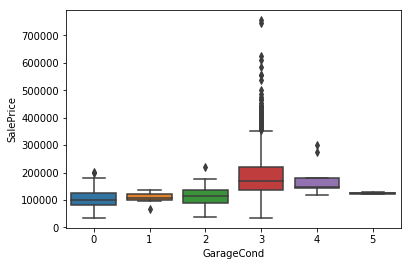

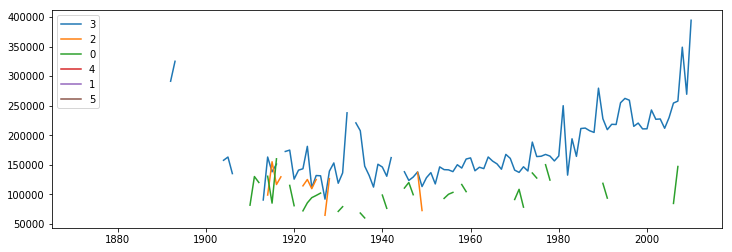

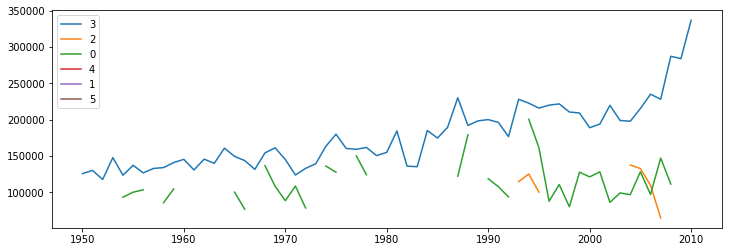

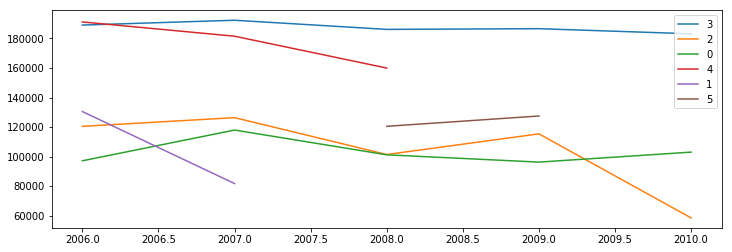

In [274]:
draw_all(this_col = 'GarageCond')